## Описание проекта
Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.
«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе. 
Итак, вашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

## Описание данных
### market_file.csv:
Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
- **id**  — номер покупателя в корпоративной базе данных;
- **Покупательская активность** — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень»;
- **Тип сервиса** — уровень сервиса, например «премиум» и «стандарт»;
- **Разрешить сообщать** — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель;
- **Маркет_актив_6_мес** — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента;
- **Маркет_актив_тек_мес** — количество маркетинговых коммуникаций в текущем месяце;
- **Длительность** — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте;
- **Акционные_покупки** — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев;
- **Популярная_категория** — самая популярная категория товаров у покупателя за последние 6 месяцев;
- **Средний_просмотр_категорий_за_визит** — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца;
- **Неоплаченные_продукты_штук_квартал** — общее число неоплаченных товаров в корзине за последние 3 месяца;
- **Ошибка_сервиса** — число сбоев, которые коснулись покупателя во время посещения сайта;
- **Страниц_за_визит** — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.


### market_money.csv
Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
- **id** — номер покупателя в корпоративной базе данных;
- **Период** — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц';
- **Выручка** — сумма выручки за период.


### market_time.csv
Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
- **id** — номер покупателя в корпоративной базе данных;
- **Период** — название периода, во время которого зафиксировано общее время;
- **минут** — значение времени, проведённого на сайте, в минутах.


### money.csv
Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
- **id** — номер покупателя в корпоративной базе данных;
- **Прибыль** — значение прибыли.

### Импорт библиотек:

In [1]:
!pip install --upgrade shap matplotlib phik

  Using cached matplotlib-3.9.4-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.3 MB)
  Using cached matplotlib-3.9.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.3 MB)
  Using cached matplotlib-3.9.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.3 MB)
  Using cached matplotlib-3.9.1.post1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.3 MB)
  Using cached matplotlib-3.9.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.3 MB)


In [2]:
!pip install --upgrade scikit-learn

In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import f_classif
from matplotlib import ticker
import matplotlib.pyplot as plt
from phik import phik_matrix
from phik.report import plot_correlation_matrix
import shap
RANDOM_STATE = 42
TEST_SIZE = 0.25

## Шаг 1. Загрузка данных

In [4]:
market_file = pd.read_csv('/datasets/market_file.csv', sep=',', decimal=',')
market_money = pd.read_csv('/datasets/market_money.csv', sep=',', decimal=',')
market_time = pd.read_csv('/datasets/market_time.csv', sep=',', decimal=',')
money = pd.read_csv('/datasets/money.csv', sep=';', decimal=',')

In [5]:
display(market_file.head())
display(market_money.head())
display(market_time.head())
display(money.head())

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.0,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


## Шаг 2. Предобработка данных

In [6]:
# создание функций для быстрого просмотра всех датафреймов на дубликаты, пропуски и инфы 
def dupp(df1, df2, df3, df4):
    check1 = df1.duplicated().sum()
    check2 = df2.duplicated().sum()
    check3 = df3.duplicated().sum()
    check4 = df4.duplicated().sum()

    return check1,check2,check3,check4

def naa(df1, df2, df3, df4):
    check1 = df1.isna().sum()
    check2 = df2.isna().sum()
    check3 = df3.isna().sum()
    check4 = df4.isna().sum()

    return check1,check2,check3,check4

def inf(df1, df2, df3, df4):
    check1 = df1.info()
    check2 = df2.info()
    check3 = df3.info()
    check4 = df4.info()

    return check1,check2,check3,check4

In [7]:
# информация
inf(market_file, market_money, market_time, money);

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   id                                   1300 non-null   int64 
 1   Покупательская активность            1300 non-null   object
 2   Тип сервиса                          1300 non-null   object
 3   Разрешить сообщать                   1300 non-null   object
 4   Маркет_актив_6_мес                   1300 non-null   object
 5   Маркет_актив_тек_мес                 1300 non-null   int64 
 6   Длительность                         1300 non-null   int64 
 7   Акционные_покупки                    1300 non-null   object
 8   Популярная_категория                 1300 non-null   object
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64 
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64 
 11  Ошибка_сервиса                       1300 n

In [8]:
# проверка на дубликаты
dupp(market_file, market_money, market_time, money)

(0, 0, 0, 0)

In [9]:
# проверка на пропуски
naa(market_file, market_money, market_time, money)

(id                                     0
 Покупательская активность              0
 Тип сервиса                            0
 Разрешить сообщать                     0
 Маркет_актив_6_мес                     0
 Маркет_актив_тек_мес                   0
 Длительность                           0
 Акционные_покупки                      0
 Популярная_категория                   0
 Средний_просмотр_категорий_за_визит    0
 Неоплаченные_продукты_штук_квартал     0
 Ошибка_сервиса                         0
 Страниц_за_визит                       0
 dtype: int64,
 id         0
 Период     0
 Выручка    0
 dtype: int64,
 id        0
 Период    0
 минут     0
 dtype: int64,
 id         0
 Прибыль    0
 dtype: int64)

In [10]:
# добавление между строк: '_'
market_file = market_file.rename(columns={'Покупательская активность': 'Покупательская_активность', 
                                         'Тип сервиса': 'Тип_сервиса', 
                                         'Разрешить сообщать':'Разрешить_сообщать'})

In [11]:
display(market_file.Покупательская_активность.value_counts())
display(market_file.Тип_сервиса.value_counts())
display(market_file.Разрешить_сообщать.value_counts())
display(market_file.Популярная_категория.value_counts())
display(market_money.Период.value_counts())
display(market_time.Период.value_counts())

Прежний уровень    802
Снизилась          498
Name: Покупательская_активность, dtype: int64

стандарт     914
премиум      376
стандартт     10
Name: Тип_сервиса, dtype: int64

да     962
нет    338
Name: Разрешить_сообщать, dtype: int64

Товары для детей                        330
Домашний текстиль                       251
Косметика и аксесуары                   223
Техника для красоты и здоровья          184
Мелкая бытовая техника и электроника    174
Кухонная посуда                         138
Name: Популярная_категория, dtype: int64

предыдущий_месяц       1300
текущий_месяц          1300
препредыдущий_месяц    1300
Name: Период, dtype: int64

предыдцщий_месяц    1300
текущий_месяц       1300
Name: Период, dtype: int64

In [12]:
# преобразование типа object в float
market_file['Маркет_актив_6_мес'] = market_file['Маркет_актив_6_мес'].astype(float)
market_file['Акционные_покупки'] = market_file['Акционные_покупки'].astype(float)
market_money.Выручка = market_money.Выручка.astype(float)

# переименование стандартт на стандарт в market_file, переименование предыдцщий_месяц в market_time
market_file.Тип_сервиса = market_file.Тип_сервиса.replace('стандартт', 'стандарт')
market_time.Период = market_time.Период.replace('предыдцщий_месяц', 'предыдущий_месяц')



Для удобства и быстрого просмотра дубликатов, пропусков и информации по каждому датафрейму созданы функции. Дубликатов и пропусков не 
выялвнено. 

Выявлен неправильный тип данных в датафрейме **market_file** в столбцах **Маркет_актив_6_мес**, **Акционные_покупки** - *object*. В датафрейме **market_money** в столбце **Выручка** - *object*. Исправлено на *float*. 

Была произведена проверка на корректность заполнения признаков. В датафрейме **market_file** в столбце **Тип_сервиса** выявлено ошибочное слово *стандартт*.
В датафрейме **market_time** так же выявлено слово *предыдцщий_месяц*. Все названия исправлены.

## Шаг 3. Исследовательский анализ данных

### Исследование датафрейма market_file

In [13]:
market_file_3_m = market_file[market_file['Неоплаченные_продукты_штук_квартал'] > 0]

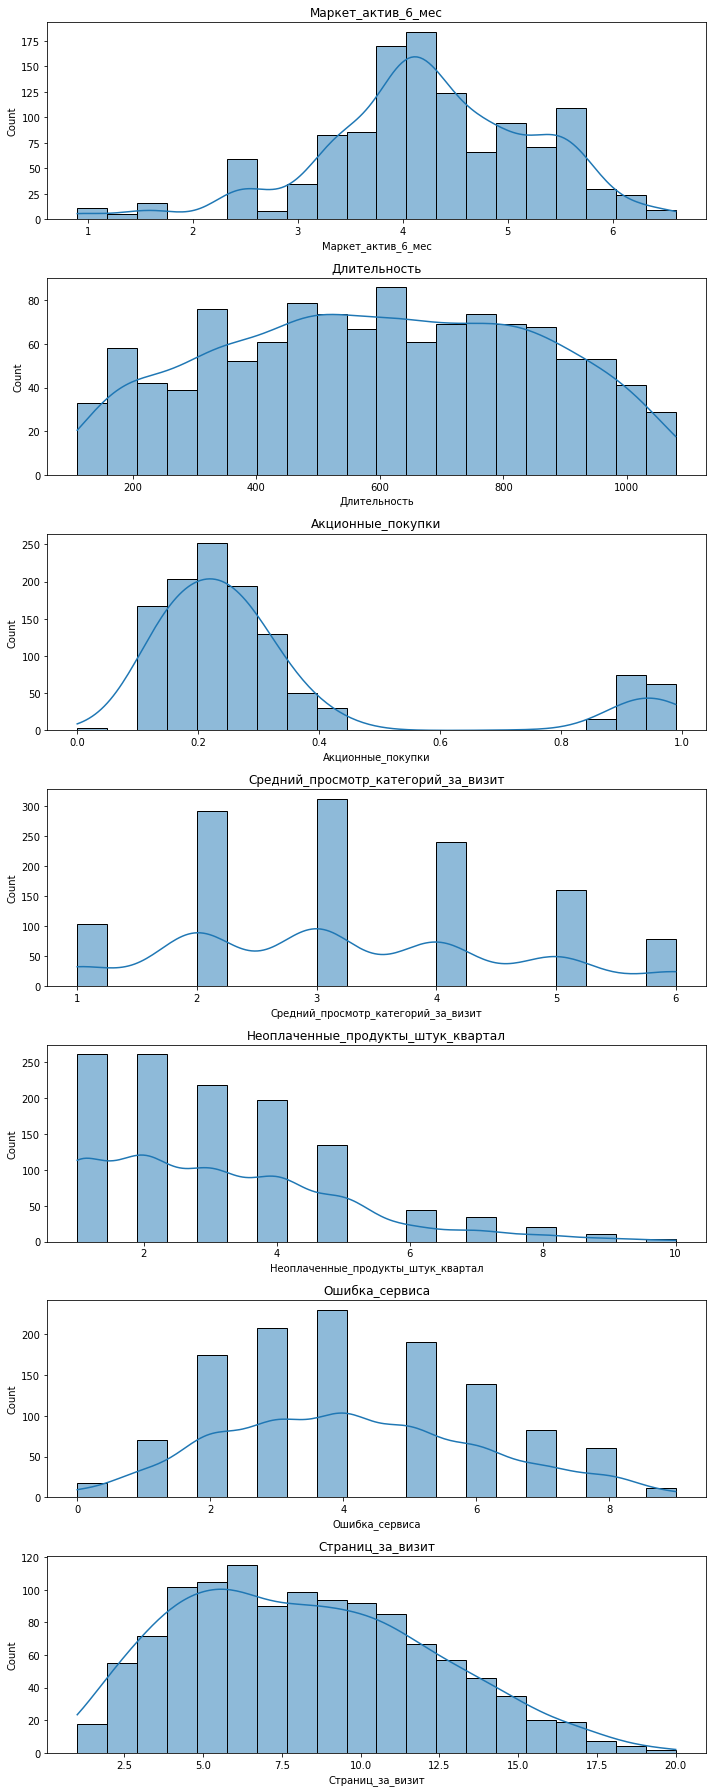

In [15]:
fig, axes = plt.subplots(7, figsize=(10, 25))

axes = axes.ravel()

for i, column in enumerate([
    'Маркет_актив_6_мес',
    'Длительность', 
    'Акционные_покупки',
    'Средний_просмотр_категорий_за_визит',
    'Неоплаченные_продукты_штук_квартал',
    'Ошибка_сервиса',
    'Страниц_за_визит'
]):
    sns.histplot(data=market_file_3_m[column], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(column)
    
plt.tight_layout()
plt.show();

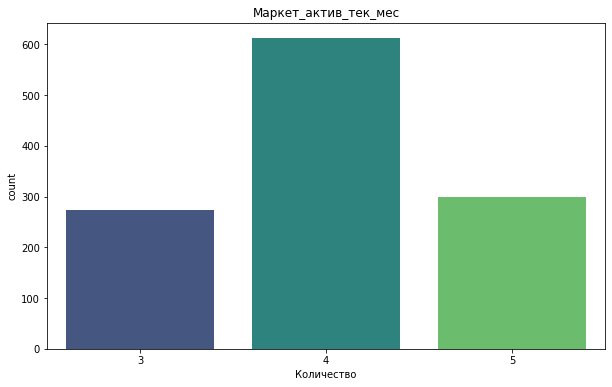

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=market_file_3_m, x='Маркет_актив_тек_мес', palette='viridis')

plt.title('Маркет_актив_тек_мес')
plt.xlabel('Количество')

plt.show()

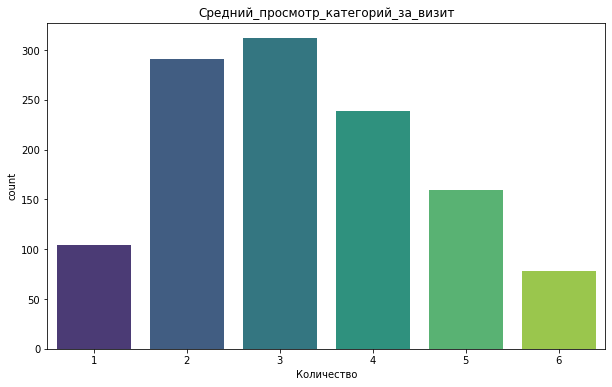

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(data=market_file_3_m, x='Средний_просмотр_категорий_за_визит', palette='viridis')

plt.title('Средний_просмотр_категорий_за_визит')
plt.xlabel('Количество')

plt.show()

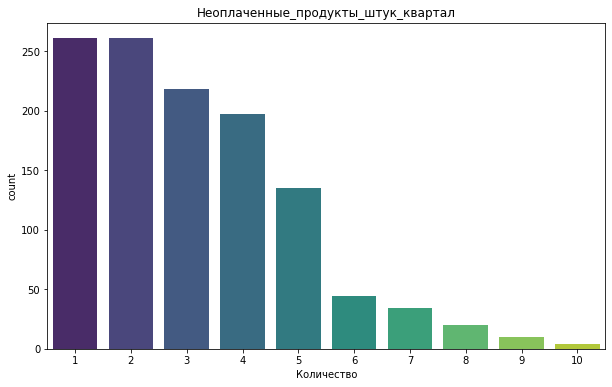

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(data=market_file_3_m, x='Неоплаченные_продукты_штук_квартал', palette='viridis')

plt.title('Неоплаченные_продукты_штук_квартал')
plt.xlabel('Количество')

plt.show()

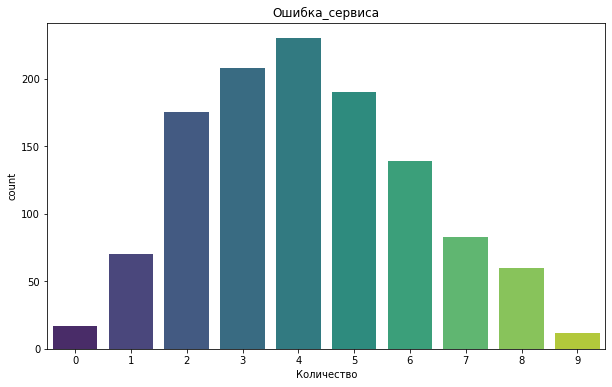

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=market_file_3_m, x='Ошибка_сервиса', palette='viridis')

plt.title('Ошибка_сервиса')
plt.xlabel('Количество')

plt.show()

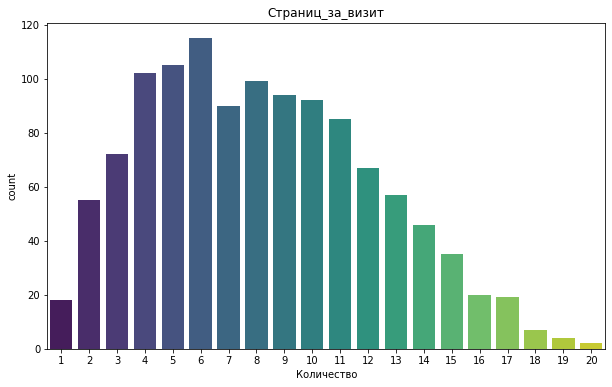

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(data=market_file_3_m, x='Страниц_за_визит', palette='viridis')

plt.title('Страниц_за_визит')
plt.xlabel('Количество')

plt.show()

In [21]:
market_file_3_m.drop('id', axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
Маркет_актив_6_мес,1184.0,4.252872,1.018514,0.9,3.70,4.20,4.90,6.60
Маркет_актив_тек_мес,1184.0,4.021959,0.695006,3.0,4.00,4.00,5.00,5.00
Длительность,1184.0,596.723818,250.225448,110.0,397.75,600.00,801.25,1079.00
Акционные_покупки,1184.0,0.320101,0.250047,0.0,0.17,0.24,0.30,0.99
Средний_просмотр_категорий_за_визит,1184.0,3.248311,1.368340,1.0,2.00,3.00,4.00,6.00
Неоплаченные_продукты_штук_квартал,1184.0,3.118243,1.843736,1.0,2.00,3.00,4.00,10.00
Ошибка_сервиса,1184.0,4.152872,1.957997,0.0,3.00,4.00,5.00,9.00
Страниц_за_визит,1184.0,8.183277,4.021837,1.0,5.00,8.00,11.00,20.00


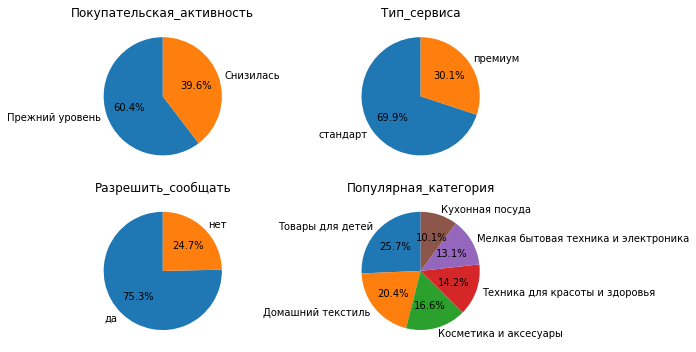

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

axes = axes.ravel()

for i, column in enumerate([
    'Покупательская_активность',
    'Тип_сервиса',
    'Разрешить_сообщать',
    'Популярная_категория'
]):
    market_file_3_m[column].value_counts().plot.pie(ax=axes[i], autopct='%1.1f%%', startangle=90)
    axes[i].set_title(column)
    axes[i].set_ylabel('') 
    
plt.tight_layout()
plt.show()

- количественные признаки в датасете market_file имеют нормальное распределение
- выбросов и аномалий выявлено небыло

### Исследование датафрейма market_money

In [23]:
market_money.head()

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [24]:
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [25]:
market_money.Период.value_counts()

предыдущий_месяц       1300
текущий_месяц          1300
препредыдущий_месяц    1300
Name: Период, dtype: int64

**Каждого признака по 1300. Для удобства анализа и объединенеия с другими датасетами по id удобней сформировать сводную таблицу:**

In [26]:
market_money = market_money.pivot_table(index='id', columns='Период', values='Выручка', aggfunc='first').reset_index()

In [27]:
market_money.head()

Период,id,предыдущий_месяц,препредыдущий_месяц,текущий_месяц
0,215348,0.0,0.0,3293.1
1,215349,5216.0,4472.0,4971.6
2,215350,5457.5,4826.0,5058.4
3,215351,6158.0,4793.0,6610.4
4,215352,5807.5,4594.0,5872.5


In [28]:
market_money.drop('id', axis=1).describe().round(2)

Период,предыдущий_месяц,препредыдущий_месяц,текущий_месяц
count,1300.00,1300.00,1300.00
mean,4936.92,4825.21,5314.96
std,739.60,405.98,2939.71
min,0.00,0.00,2758.70
25%,4496.75,4583.00,4706.05
50%,5005.00,4809.00,5179.95
75%,5405.62,5053.50,5761.72
max,6869.50,5663.00,106862.20


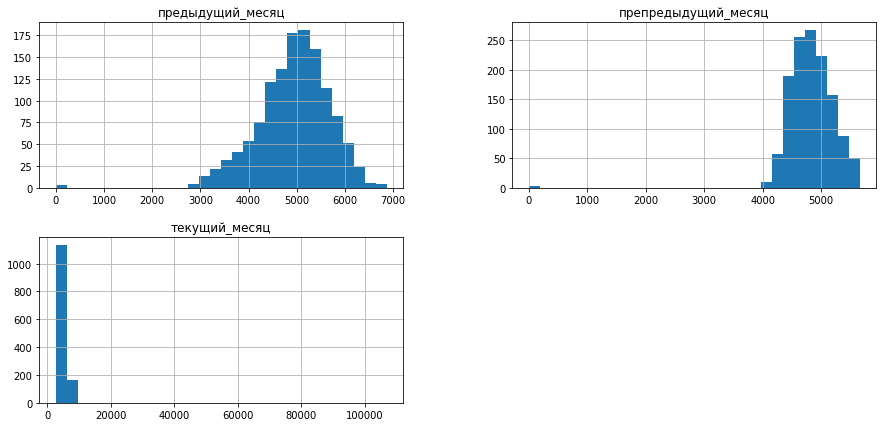

In [29]:
market_money.drop('id', axis=1).hist(figsize=(15,7), bins=30);

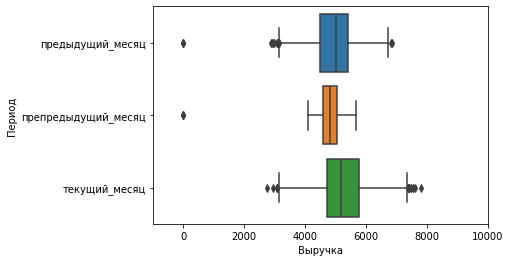

In [30]:
ax = sns.boxplot(
    data=market_money.drop('id', axis=1),
    orient='h'
)
ax.set_xlim([-1000, 10000])
ax.set_xlabel('Выручка')
plt.show()

Датасет market_money имеет аномально высокое значений выручки в признаке текущий_месяц для клиента с id = 215380.

Есть клиенты, у которых выручка в каком либо из периодов равно 0. Удалим их после объединения таблиц.

### Исследование датафрейма market_time

In [31]:
market_time.head()

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдущий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдущий_месяц,12
4,215350,текущий_месяц,13


In [32]:
market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [33]:
market_time.Период.value_counts()

предыдущий_месяц    1300
текущий_месяц       1300
Name: Период, dtype: int64

**По аналогии, как с датасетов market_money формирую сводную табоицу:**

In [34]:
market_time = market_time.pivot_table(index='id', columns='Период', values='минут', aggfunc='first').reset_index()

In [35]:
market_time

Период,id,предыдущий_месяц,текущий_месяц
0,215348,13,14
1,215349,12,10
2,215350,8,13
3,215351,11,13
4,215352,8,11
...,...,...,...
1295,216643,14,7
1296,216644,12,11
1297,216645,12,18
1298,216646,18,7


In [36]:
market_time.drop('id', axis=1).describe().round(2)

Период,предыдущий_месяц,текущий_месяц
count,1300.00,1300.00
mean,13.47,13.20
std,3.93,4.22
min,5.00,4.00
25%,11.00,10.00
50%,13.00,13.00
75%,17.00,16.00
max,23.00,23.00


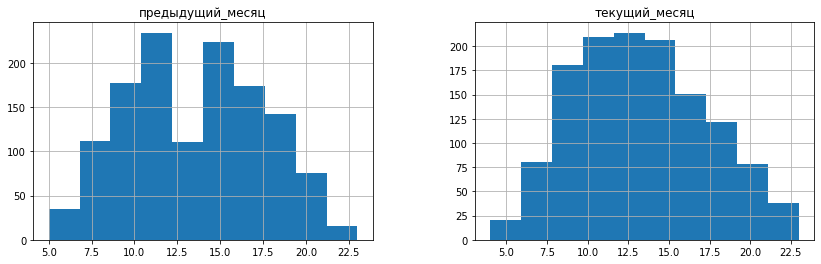

In [37]:
market_time.drop('id', axis=1).hist(figsize=(14,4));

### Исследование датафрейма money

In [38]:
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


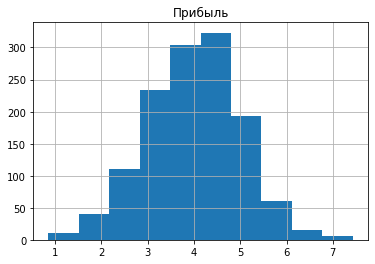

In [39]:
money.drop('id', axis=1).hist();

В датафреймах market_file, market_time и money в процессе исследования выбросов не обнаружено. При этом в датафрейме в гистограмме распределения market_money показало явный выброс. Таблица результатов расчета по методу describe в текущем месяце показало максимальную выручку - 106862.2, что является явной аномалией при ожидаемых показателях 5000-6000.

## Шаг 4. Объединение таблиц

In [40]:
market_full = market_file \
    .merge(market_money, on='id') \
    .merge(market_time, on='id', suffixes=('_выручка', '_время')) \
    .set_index('id')

In [41]:
market_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 215348 to 216647
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Покупательская_активность            1300 non-null   object 
 1   Тип_сервиса                          1300 non-null   object 
 2   Разрешить_сообщать                   1300 non-null   object 
 3   Маркет_актив_6_мес                   1300 non-null   float64
 4   Маркет_актив_тек_мес                 1300 non-null   int64  
 5   Длительность                         1300 non-null   int64  
 6   Акционные_покупки                    1300 non-null   float64
 7   Популярная_категория                 1300 non-null   object 
 8   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 9   Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 10  Ошибка_сервиса                       1300 non-null   int64  
 11  Страниц_за_визит       

In [42]:
# перевод к нижнему регистру
market_full.columns = market_full.columns.str.lower()

# удаление аномальных значений
market_full = market_full[market_full['предыдущий_месяц_выручка'] != 0]
market_full = market_full[market_full['текущий_месяц_выручка'] != 106862.2]

<Axes: >

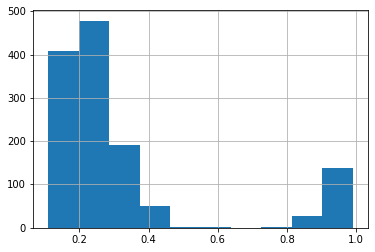

In [43]:
market_full['акционные_покупки'].hist()

Согласно выведенному графику гисторгаммы, наблюдается явная сигментация данных и разделение данных на две группы: "менее половины" и "более половины".
Создадим бинарный признак с учетом границы разделения 0.6 и запишем его в столбец **акционные_покупки**.

In [44]:
market_full['акционные_покупки'] = market_full['акционные_покупки'] > 0.6
market_full.head()

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,предыдущий_месяц_выручка,препредыдущий_месяц,текущий_месяц_выручка,предыдущий_месяц_время,текущий_месяц_время
id,,,,,,,,,,,,,,,,,
215349,Снизилась,премиум,да,4.4,4,819,True,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
215350,Снизилась,стандарт,нет,4.9,3,539,False,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
215351,Снизилась,стандарт,да,3.2,5,896,True,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
215352,Снизилась,стандарт,нет,5.1,3,1064,True,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
215353,Снизилась,стандарт,да,3.3,4,762,False,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10


В рамках преобразование данных по выручке, преобразуем группу признаков, которые описывают покупательское поведение клиента **выручка**.
Сейчас таких признаков 3: **препредыдущий_месяц_выручка**, **предыдущий_месяц_выручка** и **текущий_месяц_выручка**. 

Нам необходимо получить 2 новых признака: **разница_предыдущий_препредыдущий_месяц_выручка** и **разница_текущий_предыдущий_месяц_выручка**.

In [45]:
# получение новых признаков
market_full['разница_предыдущий_препредыдущий_месяц_выручка'] = \
market_full['предыдущий_месяц_выручка'] - market_full['препредыдущий_месяц']
market_full['разница_предыдущий_препредыдущий_месяц_выручка']

market_full['разница_текущий_предыдущий_месяц_выручка'] = \
market_full['текущий_месяц_выручка'] - market_full['предыдущий_месяц_выручка']
market_full['разница_текущий_предыдущий_месяц_выручка']

id
215349    -244.4
215350    -399.1
215351     452.4
215352      65.0
215353     650.0
           ...  
216643    1077.7
216644     624.0
216645     -20.8
216646     301.6
216647    -271.7
Name: разница_текущий_предыдущий_месяц_выручка, Length: 1296, dtype: float64

In [46]:
# удаление ненужных столбцов
market_full = market_full.drop(
    ['предыдущий_месяц_выручка', 'препредыдущий_месяц'], axis=1
)

# перезаписываем целевой столбец
market_full['покупательская_активность'] = \
(market_full['покупательская_активность'] == 'Снизилась').astype(int)

## Шаг 5. Корреляционный анализ

**Подсчет и вывод матрицы корреляции:**

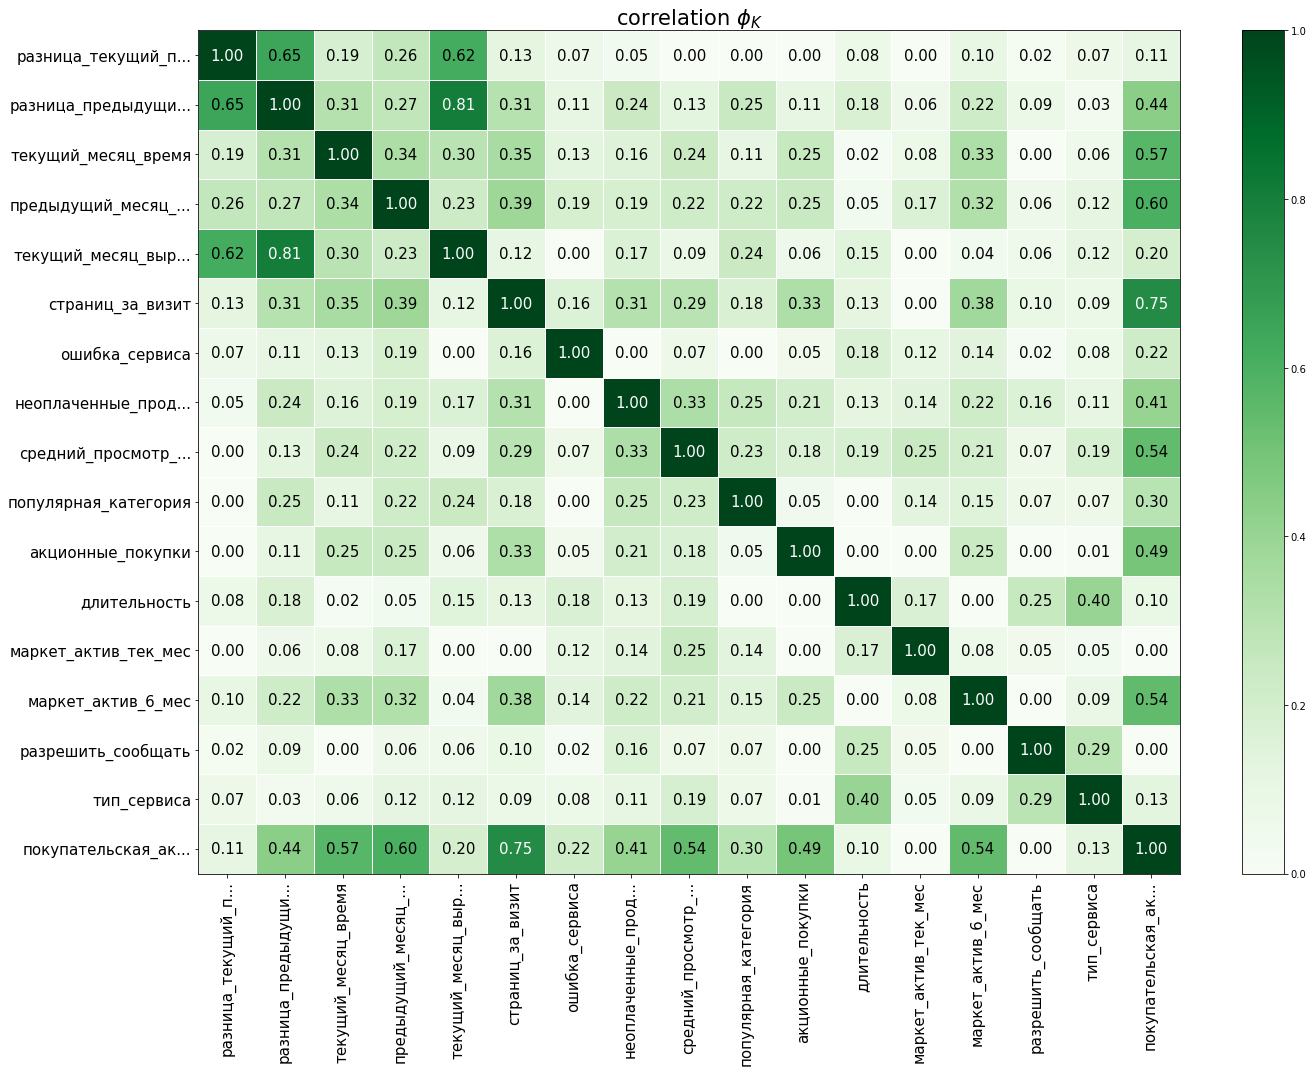

In [47]:
interval_cols = market_full[['маркет_актив_6_мес', 
                             'длительность', 
                             'текущий_месяц_выручка', 
                             'разница_предыдущий_препредыдущий_месяц_выручка', 
                             'разница_текущий_предыдущий_месяц_выручка']]
phik_overview = phik_matrix(market_full, interval_cols=interval_cols)

plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
)

Анализ матрицы корреляции показал, что признаки мультиколлинеарности в составе анализируемых данных не обнаружены, при этом между наблюдениями по признакам **текущий_месяц_выручка** и **разница_предыдущий_препредыдущий_месяц_выручка** показывают высокую корреляционную сходимость (0.81), что говорит о близости данных признаков по природе своего происхождения.

## Шаг 6. Использование пайплайнов

In [48]:
# Разделение на выборки
X = market_full.drop('покупательская_активность', axis=1)
y = market_full['покупательская_активность']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = TEST_SIZE,
    random_state = RANDOM_STATE,
    stratify=y
)

print('Размерность X_train', X_train.shape)
print('Размерность X_test', X_test.shape)
print('Размерность y_train', y_train.shape)
print('Размерность y_test', y_test.shape)

Размерность X_train (972, 16)
Размерность X_test (324, 16)
Размерность y_train (972,)
Размерность y_test (324,)


In [49]:
# инициализация OneHotEncoder, OrdinalEncoder()
ohe_ecnoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
ord_ecnoder = OrdinalEncoder(categories=[[False, True]], handle_unknown='use_encoded_value', unknown_value=np.nan)

In [50]:
# инициализация ColumnTransformer() без OrdinalEncoder
data_preprocessor_without_ord = ColumnTransformer(
    [
        # передаем OneHotEncoder()
        ('ohe', ohe_ecnoder, X_train.select_dtypes(exclude='number').columns.to_list()),
        ('num', None, X_train.select_dtypes(include='number').columns.to_list())
    ],
    remainder='passthrough'
)

In [51]:
# инициализация списка с названиями признаков (категориальных и количественных)
ohe_columns = X_train.select_dtypes(exclude='number').columns.to_list()
ohe_columns.remove('акционные_покупки')
ord_columns = ['акционные_покупки']

# инициализируем ColumnTransformer() c OrdinalEncoder
data_preprocessor_with_ord = ColumnTransformer(
    [
        ('ohe', ohe_ecnoder, ohe_columns),
        ('ord', ord_ecnoder, ord_columns),
        ('num', None, X_train.select_dtypes(include='number').columns.to_list())
    ], 
    remainder='passthrough'
)

In [52]:
# инициализация Pipeline
pipeline = Pipeline(
    [
        ('preprocessor', None),
        ('selector', SelectKBest(score_func=f_classif)),
        ('classifier', None)
    ]
)

In [53]:
# инициализация списка параметров
selector_k_range = range(15, 21)
scalers = [StandardScaler(), MinMaxScaler(), 'passthrough']
column_transformers = [data_preprocessor_with_ord, data_preprocessor_without_ord]

In [54]:
# инициализация словарей с гиперпараметрами
param_grid = [
    {
        'classifier' : [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'classifier__min_samples_split' : range(2, 4),
        'classifier__min_samples_leaf' : range(1, 3),
        'classifier__max_depth' : range(3, 5),
        'classifier__max_features' : range(3, 5),
        'preprocessor' : column_transformers,
        'preprocessor__num' : scalers,
        'selector__k' : selector_k_range
    },
    {
        'classifier' : [KNeighborsClassifier()],
        'classifier__n_neighbors' : range(3, 6),
        'preprocessor' : column_transformers,
        'preprocessor__num' : scalers,
        'selector__k' : selector_k_range
    },
    {
        'classifier' : [
            LogisticRegression(
                class_weight='balanced',
                random_state=RANDOM_STATE,
                solver='liblinear',
                penalty='l1'
            )
        ],
        'classifier__C' : range(2, 7),
        'preprocessor' : [data_preprocessor_without_ord],
        'preprocessor__num' : scalers,
        'selector__k' : selector_k_range
    },
    {
        'classifier': [SVC(probability=True, random_state=RANDOM_STATE)],
        'classifier__kernel': ['rbf', 'poly'],
        'classifier__degree': range(1, 4),
        'classifier__C': range(1, 4),
        'preprocessor' : column_transformers,
        'preprocessor__num': scalers,
        'selector__k' : selector_k_range
    }
]

In [55]:
# инициализация объекта GridSearchCV
grid = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1
)

In [56]:
grid.fit(X_train, y_train);

In [57]:
pd.DataFrame(grid.cv_results_).sort_values(by='rank_test_score', ascending=True).head(100)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__max_depth,param_classifier__max_features,param_classifier__min_samples_leaf,param_classifier__min_samples_split,param_preprocessor,...,param_classifier__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
709,0.030964,0.008375,0.008783,0.000144,"LogisticRegression(class_weight='balanced', pe...",NaN,NaN,NaN,NaN,"ColumnTransformer(remainder='passthrough',\n ...",...,NaN,{'classifier': LogisticRegression(class_weight...,0.842857,0.830986,0.779221,0.827160,0.763889,0.808823,0.031245,1
711,0.034646,0.007819,0.008874,0.000159,"LogisticRegression(class_weight='balanced', pe...",NaN,NaN,NaN,NaN,"ColumnTransformer(remainder='passthrough',\n ...",...,NaN,{'classifier': LogisticRegression(class_weight...,0.842857,0.830986,0.779221,0.827160,0.750000,0.806045,0.035450,2
727,0.028760,0.007701,0.008557,0.000282,"LogisticRegression(class_weight='balanced', pe...",NaN,NaN,NaN,NaN,"ColumnTransformer(remainder='passthrough',\n ...",...,NaN,{'classifier': LogisticRegression(class_weight...,0.842857,0.830986,0.779221,0.827160,0.750000,0.806045,0.035450,2
719,0.128877,0.021342,0.010279,0.003090,"LogisticRegression(class_weight='balanced', pe...",NaN,NaN,NaN,NaN,"ColumnTransformer(remainder='passthrough',\n ...",...,NaN,{'classifier': LogisticRegression(class_weight...,0.842857,0.830986,0.779221,0.827160,0.750000,0.806045,0.035450,2
745,0.032954,0.007032,0.009735,0.000462,"LogisticRegression(class_weight='balanced', pe...",NaN,NaN,NaN,NaN,"ColumnTransformer(remainder='passthrough',\n ...",...,NaN,{'classifier': LogisticRegression(class_weight...,0.842857,0.830986,0.779221,0.827160,0.750000,0.806045,0.035450,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,0.095996,0.013321,0.013475,0.001148,"SVC(probability=True, random_state=42)",NaN,NaN,NaN,NaN,"ColumnTransformer(remainder='passthrough',\n ...",...,rbf,"{'classifier': SVC(probability=True, random_st...",0.800000,0.760563,0.753247,0.765432,0.750000,0.765848,0.017913,91
1353,0.089858,0.004057,0.016793,0.003049,"SVC(probability=True, random_state=42)",NaN,NaN,NaN,NaN,"ColumnTransformer(remainder='passthrough',\n ...",...,rbf,"{'classifier': SVC(probability=True, random_st...",0.771429,0.788732,0.779221,0.728395,0.736111,0.760778,0.024050,97
1371,0.092090,0.001206,0.012794,0.001975,"SVC(probability=True, random_state=42)",NaN,NaN,NaN,NaN,"ColumnTransformer(remainder='passthrough',\n ...",...,rbf,"{'classifier': SVC(probability=True, random_st...",0.771429,0.788732,0.779221,0.728395,0.736111,0.760778,0.024050,97
1281,0.109151,0.008494,0.016198,0.002997,"SVC(probability=True, random_state=42)",NaN,NaN,NaN,NaN,"ColumnTransformer(remainder='passthrough',\n ...",...,rbf,"{'classifier': SVC(probability=True, random_st...",0.771429,0.788732,0.779221,0.728395,0.736111,0.760778,0.024050,97


In [58]:
# инициализация лучшей модели, обучение и получение прогнозов на тестовой выборке
pipeline = grid.best_estimator_
y_pred = pipeline.fit(X_train, y_train).predict(X_test)

In [59]:
print("Лучшие параметры: ", grid.best_params_)
print(f'Лучшая метрика RECALL на кросс-валидации: {grid.best_score_}')
print(f'Метрика RECALL на тестовой выборке: {recall_score(y_test, y_pred)}')

Лучшие параметры:  {'classifier': LogisticRegression(class_weight='balanced', penalty='l1', random_state=42,
                   solver='liblinear'), 'classifier__C': 3, 'preprocessor': ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['тип_сервиса', 'разрешить_сообщать',
                                  'акционные_покупки',
                                  'популярная_категория']),
                                ('num', None,
                                 ['маркет_актив_6_мес', 'маркет_актив_тек_мес',
                                  'длительность',
                                  'средний_просмотр_категорий_за_визит',
                                  'неоплаченные_продукты_штук_квартал',
                       

Применение пайплайна с обученными моделями показал, что для расчетов наилучшим образом подходит модель LogisticRegression с соответствующими расчетами наилучших параметров. Выводы подтверждаются метрикой RECALL на кросс-валидации и тестовой выборке.

Можно попробовать увеличить метрику RECALL путем снижения порога, так как для нас важна полнота, для оценки которой построим матрицу ошибок модели.

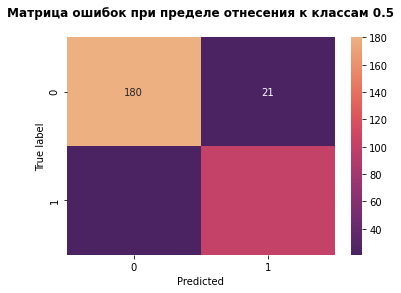

In [61]:
# построение матрицы ошибок
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='flare_r')
ax.set_title('Матрица ошибок при пределе отнесения к классам 0.5\n', fontweight='bold')
plt.ylabel('True label')
plt.xlabel('Predicted')
plt.show()

При текущем состоянии при отнесении порога матрицы ошибок на уровень 0.5 мы имеем достаточно низкие показатели ошибок 1 и 2 рода. 
Для минимизации ошибки второго рода попробуем снизить порог отнесения покупательской активности к классу Снизилась (1). Будем понижать предел вероятности отнесения к классу 1 постепенно, до тех пор, пока метрика RECALL не станет равна единице. Для этого определим функцию get_max_recall_conditions(). Она позволит рассчитать максимальное значение предела, при котором метрика RECALL будет наилучшая.

In [62]:
# функция принимает на вход истиные значения целевой переменной и предсказанные вероятности
def get_max_recall_conditions(y_true, y_predict_proba):    
    for threshold in reversed(np.linspace(0.0, 0.5, num=500, endpoint=True)):
        current_y_predictions = (y_predict_proba[:, 1] > threshold).astype(int)
        if recall_score(y_true, current_y_predictions) == 1:
            return threshold, current_y_predictions

Сначала посмотрим как рапределены вероятности отнесения наблюдений к классам на тестовой выборке. Выведем гистограмму частотности.

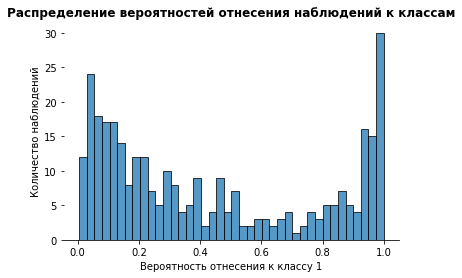

In [63]:
# получаем вероятности
y_proba = pipeline.predict_proba(X_test)

# выводим гистограмму
ax = sns.histplot(y_proba[:, 1], bins=40)

# устанавливаем название и подписи осей графика
ax.set_title('Распределение вероятностей отнесения наблюдений к классам', fontweight='bold')
ax.set_ylabel('Количество наблюдений')
ax.set_xlabel('Вероятность отнесения к классу 1')
    
# убираем лишнее
ax.grid(False)
sns.despine(left=True)
plt.show()

По гистограмме видно, что крайних значений сильно больше, чем занчений в районе 0.5. Это значит, что модель уверенно присваивает метки. Придется очень сильно двигать порог для достижения максимального показателя метрики RECALL. При этом мы получим большую ошибку 1-го рода.

In [64]:
threshold, y_pred_threshold = get_max_recall_conditions(y_test, y_proba)
print('Предел отнесения наблюдения к классу 1 для максимуму RECALL:', threshold)

Предел отнесения наблюдения к классу 1 для максимуму RECALL: 0.022044088176352703


Предел отнесения наблюдения к классу 1 для максимуму RECALL: 0.022044088176352703

Посмотрим на матрицу ощибок при таком пределе.

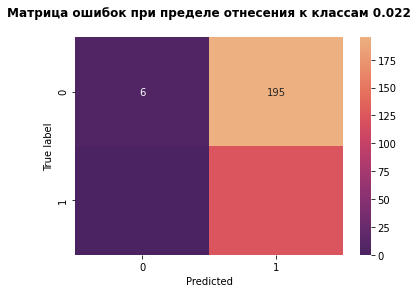

In [65]:
# построение матрицы ошибок
cm = confusion_matrix(y_test, y_pred_threshold)
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='flare_r')
ax.set_title(
    f'Матрица ошибок при пределе отнесения к классам {round(threshold, 3)}\n',
    fontweight='bold'
)
plt.ylabel('True label')
plt.xlabel('Predicted')
plt.show()

Ожидаемо мы получили огромную ошибку 1-го рода (195). Оставим пределе на дефолтном значении (0.5).

Промежуточные выводы по обучению моделей
Лучшей моделью по метрике RECALL оказалась логистическая регрессия со следующими параметрами:

class_weight='balanced'

C=3

penalty='l1'

solver='liblinear'

MinMaxScaler()

SelectKBest(score_func=f_classif, k=16)

Метрика RECALL на кросс-валидации: 0.8

Метрика RECALL на тестовой выборке: 0.83

Снижение предела отнесения наблюдения к классу 1 несет большие издержки в общей точности модели.

На этом исследование качества работы моделей в рамках пайплайма завершено.

## Шаг 7. Анализ важности признаков

Получаем наборы признаков, отобранных и подготовленных для обучения лучшей модели. Определим функцию для подготовки признаков.

In [66]:
# функция принимает на вход объект набор признаков, объект ColumnTransformer (fitted)
# и селектор для отбора признаков (fitted)
def prepare_features(X, preprocessor, selector):
    X_transformed_selected = pd.DataFrame(
        data=preprocessor.transform(X),
            columns=pipeline['preprocessor'].get_feature_names_out()
    ).loc[:, selector.get_support()]
    return X_transformed_selected

In [67]:
# вызываем ранее определенную функцию для подготовки данных
X_train_transformed_selected = prepare_features(
    X=X_train,
    preprocessor=pipeline['preprocessor'],
    selector=pipeline['selector']
)

In [68]:
# смотрим на общую информацию
X_train_transformed_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972 entries, 0 to 971
Data columns (total 16 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   ohe__тип_сервиса_стандарт                                       972 non-null    float64
 1   ohe__акционные_покупки_True                                     972 non-null    float64
 2   ohe__популярная_категория_Косметика и аксесуары                 972 non-null    float64
 3   ohe__популярная_категория_Кухонная посуда                       972 non-null    float64
 4   ohe__популярная_категория_Мелкая бытовая техника и электроника  972 non-null    float64
 5   ohe__популярная_категория_Техника для красоты и здоровья        972 non-null    float64
 6   ohe__популярная_категория_Товары для детей                      972 non-null    float64
 7   num__маркет_актив_6_мес                              

После кодирования (OneHotEncoder()) и отбора признаков (SelectKBest()) имеется 18 признаков для обучения модели. Из них 7 ohe и 11 количественных (num). Визуализируем вклад признаков в каждое предсказание модели методом SHAP. Определим функции для вывода графиков.

In [69]:
# функция принимает на вход модель и подготовленный для нее набор признаков
def plot_shap_beeswarm(model, X_transformed_selected):
    explainer = shap.LinearExplainer(model, X_transformed_selected)
    shap_values = explainer(X_transformed_selected)
    shap.plots.beeswarm(
        shap_values,
        max_display=len(X_transformed_selected)
    )
    pass

# функция принимает на вход модель и подготовленный для нее набор признаков
def plot_shap_bar(model, X_transformed_selected):
    explainer = shap.LinearExplainer(model, X_transformed_selected)
    shap_values = explainer(X_transformed_selected)
    shap.plots.bar(
        shap_values,
        max_display=len(X_train_transformed_selected)
    )
    pass

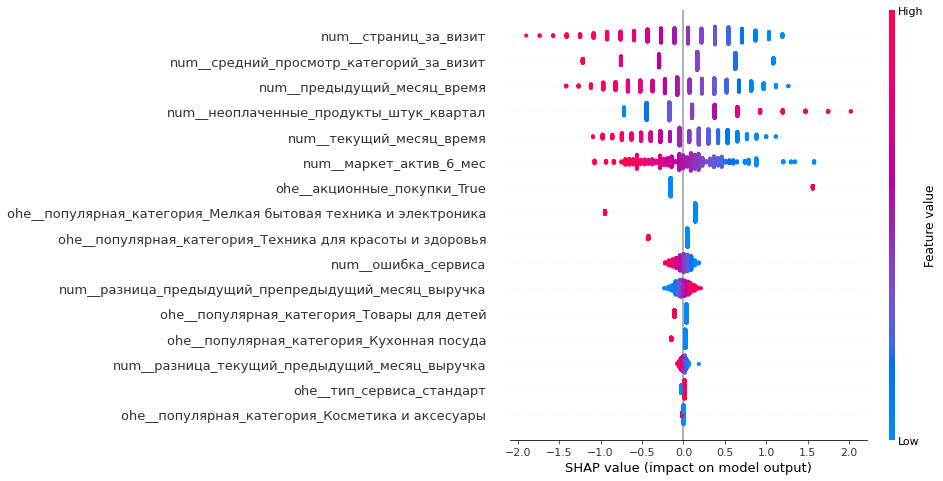

In [70]:
plot_shap_beeswarm(
    model=pipeline['classifier'],
    X_transformed_selected=X_train_transformed_selected
)

Построим столбчатая диаграмма shap.plots.bar, которая отражает общий вклад признаков в прогнозы модели. Она показывает средние SHAP-значения признака по всем наблюдениям.

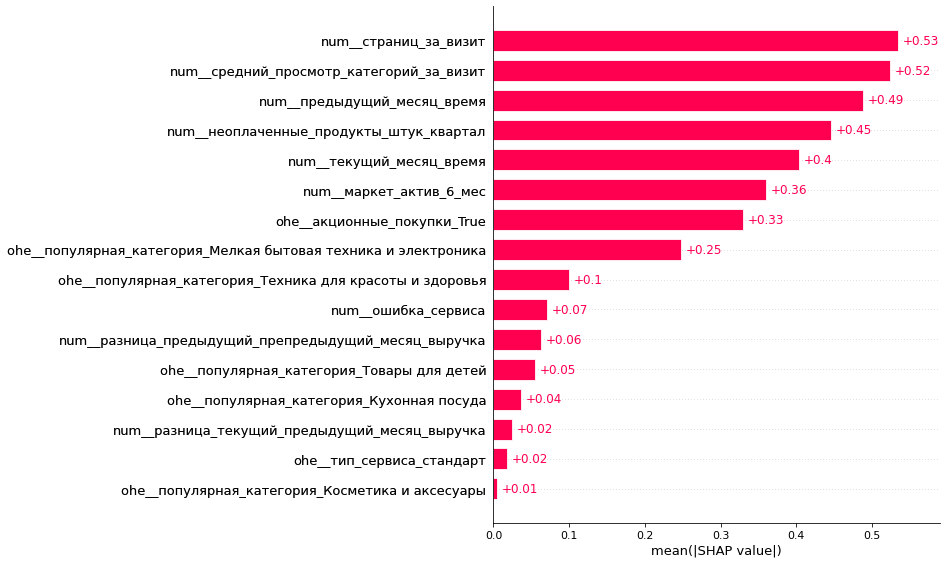

In [71]:
plot_shap_bar(
    model=pipeline['classifier'],
    X_transformed_selected=X_train_transformed_selected
)

Согласно визуализациям SHAP, на целевую переменную наиболее существенно влияют количественные показатели, связанные с взаимодействием пользователя с сайтом, такие как время, проведённое на сайте, число просмотренных категорий и страниц, а также количество отправленных рассылок, звонков и рекламных показов. Снижение этих показателей способствует увеличению вероятности снижения покупательской активности клиента.

Сведения о продуктовом поведении клиента (категории товаров) оказывают малое влияние на предсказание уменьшения покупательской активности. Можно лишь отметить, что рост популярности категории «Мелкая бытовая техника и электроника» заставляет модель предполагать негативный прогнозному сценарию.

## Шаг 8. Сегментация покупателей


Для анализа возьмем группу клиентов с высокой вероятностью снижения покупательской активности и наиболее высокой прибыльностью. Пределы прибыльности и показатели вероятности снижения покупателской активности рассмотрим графически с помощью диаграммы рассеяния.

In [72]:
market_all = market_full
# задаем пределы
PROBA_THRESHOLD_1 = 0.9
PROBA_THRESHOLD_0 = 0.1
PROFIT_THRESHOLD = 2.4

# собираем данные для анализа в общий датафрейм
# выводим размерность до объединения
print('Shape before', market_all.shape)

# записываем столбец с вероятностями отнесения к классу 1 (снижение покупательской активности)
market_all['вероятность_снижения_активности'] = pipeline.predict_proba(market_all)[:, 1]

# записываем столбец с прогнозами лучшей модели
market_all['predicted_target'] = pipeline.predict(market_all)

# объединяем датасет с информацией о прибыли
market_all = market_all.merge(money, on='id', how='inner')

# выводим размерность полсе объединения
print('Shape after', market_all.shape)

# выводим случайные 10 строк нового датасета
market_all.sample(10)

# получаем срез по целевому сегменту
market_segment_target = market_all.query(
    f'вероятность_снижения_активности > {PROBA_THRESHOLD_1} and Прибыль > {PROFIT_THRESHOLD}'
)

# получаем срез по сегменту для сравнения
market_segment_to_compare = market_all.query(
    f'вероятность_снижения_активности < {PROBA_THRESHOLD_0} and Прибыль > {PROFIT_THRESHOLD}'
)
print('market_segment_target shape', market_segment_target.shape)
print('market_segment_to_compare shape', market_segment_to_compare.shape)

Shape before (1296, 17)
Shape after (1296, 21)
market_segment_target shape (251, 21)
market_segment_to_compare shape (253, 21)


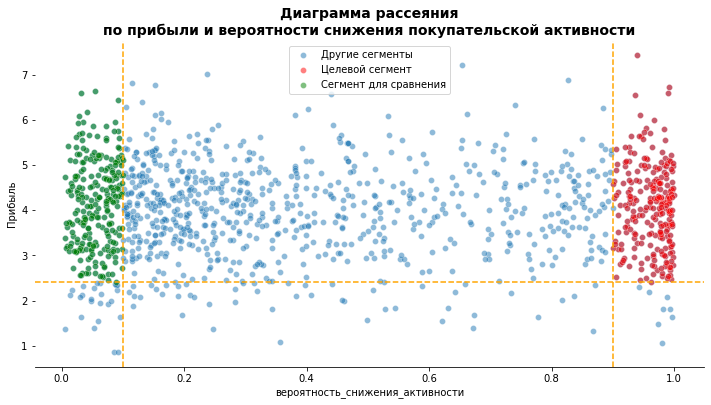

In [73]:
# рисуем диаграмму рассеяния по сегментам
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=market_all,
    x='вероятность_снижения_активности',
    y='Прибыль',
    alpha=0.5,
    label='Другие сегменты'
    
)
sns.scatterplot(
    data=market_segment_target,
    x='вероятность_снижения_активности',
    y='Прибыль',
    alpha=0.5,
    color='red',
    label='Целевой сегмент'
)
sns.scatterplot(
    data=market_segment_to_compare,
    x='вероятность_снижения_активности',
    y='Прибыль',
    alpha=0.5,
    color='green',
    label='Cегмент для сравнения'
)
plt.title(
    'Диаграмма рассеяния\nпо прибыли и вероятности снижения покупательской активности',
    fontsize=14,
    fontweight='bold'
)
plt.legend()
plt.axvline(x=PROBA_THRESHOLD_1, color='orange', linestyle='--')
plt.axvline(x=PROBA_THRESHOLD_0, color='orange', linestyle='--')
plt.axhline(y=PROFIT_THRESHOLD, color='orange', linestyle='--')
sns.despine(left=True)
plt.show()

Выведем гистограммы частотности для количественных признаков для разных сегментов покупателей: с высокой и низкой вероятностью снижения покупательской способности.

In [74]:
# инициализируем список названий необходимых количественных признаков
num_features = market_segment_target.select_dtypes(include='number').columns.to_list()
num_features.remove('id')
num_features.remove('predicted_target')
num_features.remove('покупательская_активность')
num_features.remove('вероятность_снижения_активности')

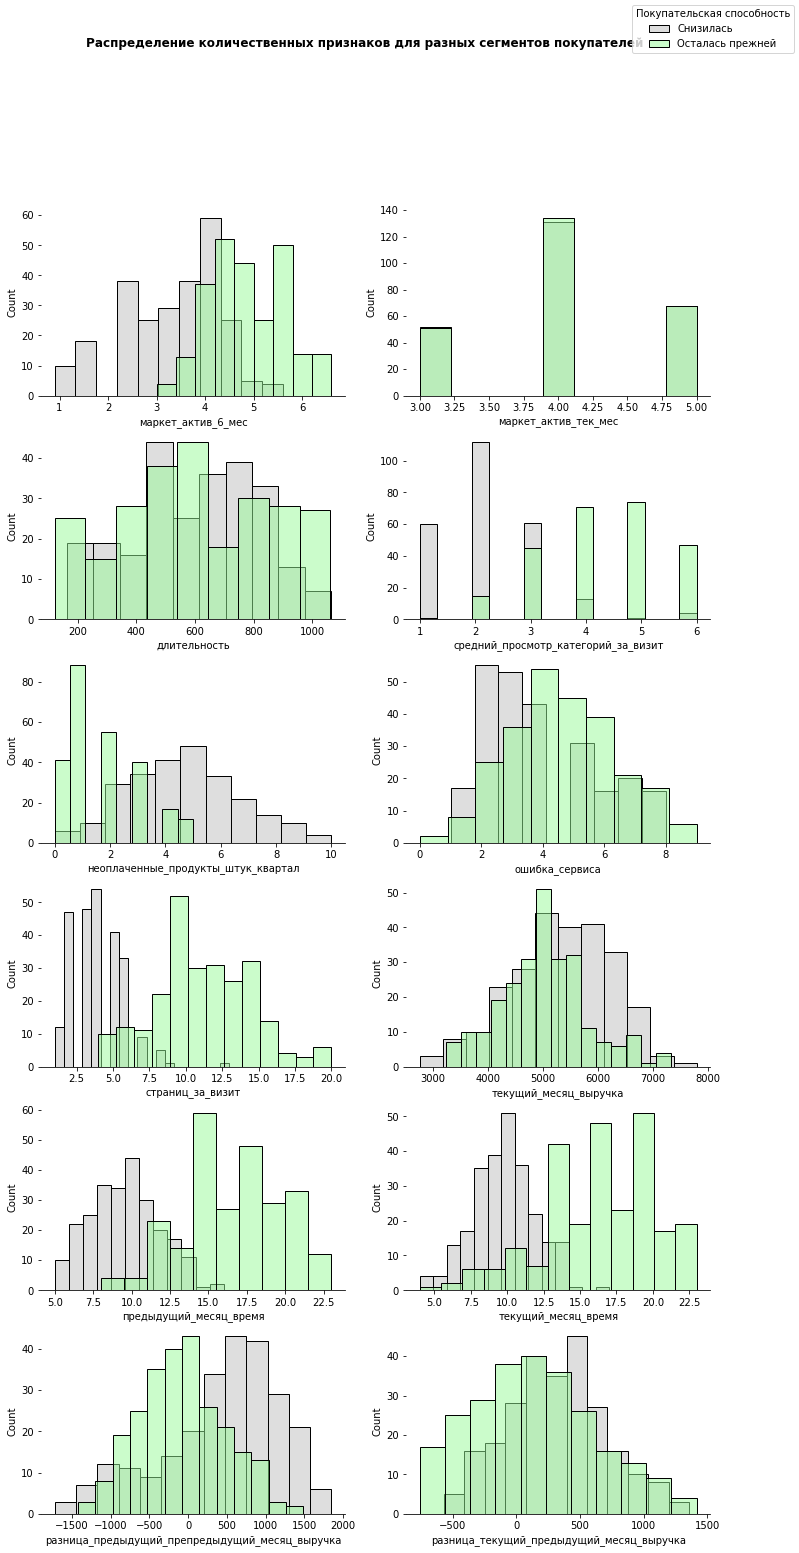

In [75]:
# задаем количество областей для рисования и их размеры
fig, axs = plt.subplots(
    ncols=2,
    nrows=6,
    figsize=(12, 24),
)

OPACITY = 0.5
palette = ['palegreen', 'lightgray']

counter = 0
for row in axs:
    for ax in row:
        sns.histplot(
            data=market_segment_target,
            x=num_features[counter],
            ax=ax,
            color=palette[1],
            label='Снизилась'
        )
        ax.grid = False
        counter += 1
        pass
    pass
    
counter = 0
for row in axs:
    for ax in row:
        sns.histplot(
            # передаем датасет с сегментом для сравнения
            data=market_segment_to_compare,
            x=num_features[counter],
            ax=ax,
            color=palette[0],
            alpha=OPACITY,
            label='Осталась прежней'
        )
        ax.grid = False
        counter += 1
        pass
    pass

handles, labels = axs[0, 0].get_legend_handles_labels()

fig.legend(
    handles,
    labels,
    loc='upper right',
    title='Покупательская способность',
    fontsize=10
)

fig.suptitle(
    'Распределение количественных признаков для разных сегментов покупателей',
    fontsize=12,
    fontweight='bold'
)

sns.despine(left=True)
plt.show()        


Для двух сегментов, с высокой и низкой вероятностью снижения покупательской активности, распределения количественных признаков отличаются. Так в выбранном сегменте (серая категория) покупатели меньше времени проводят на сайте, имеют больше неоплаченных товаров в корзине, меньше смотрят категорий и страниц, а так же на них приходится меньшее количество маркетинговых коммуникаций. Посмотрим как распределены категориальные значения в группах.

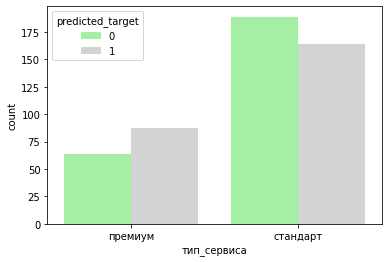

In [76]:
# вывод количественных диаграмм для кажного категориального признака
# с разбиением по целевой переменной
sns.countplot(
    data=pd.concat([market_segment_target, market_segment_to_compare], axis=0),
    x='тип_сервиса',
    hue='predicted_target',
    palette=palette
)
plt.show()

Категории практически не отличаются по типу сервиса.

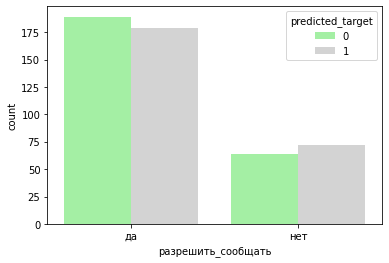

In [77]:
sns.countplot(
    data=pd.concat([market_segment_target, market_segment_to_compare], axis=0),
    x='разрешить_сообщать',
    hue='predicted_target',
    palette=palette
)
plt.show()

По признаку разрешить_сообщать так же нет существенных отличий.



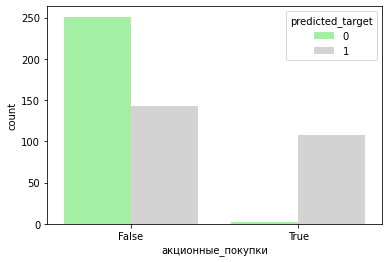

In [78]:
sns.countplot(
    data=pd.concat([market_segment_target, market_segment_to_compare], axis=0),
    x='акционные_покупки',
    hue='predicted_target',
    palette=palette
)
plt.show()

В сегменте с высокой вероятностью снижения покупательской активности (predicted_target = 1) количество покупок по акции существенно выше.

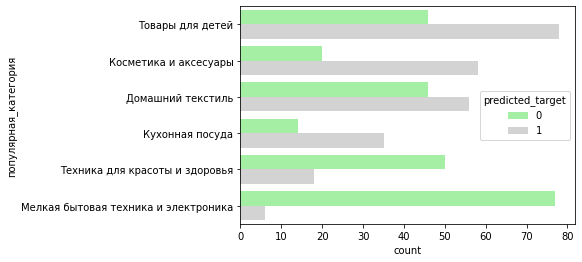

In [79]:
sns.countplot(
    data=pd.concat([market_segment_target, market_segment_to_compare], axis=0),
    y='популярная_категория',
    hue='predicted_target',
    orient='h',
    order=market_segment_target['популярная_категория'].value_counts().index,
    palette=palette
)
plt.show()

В сегменте с высокой вероятностью снижения покупательской активности (predicted_target = 1) самыми популярными категориями являются Товары для детей и Косметика и аксессуары, а самыми непопулярными - Техника техника для красоты и здоровья и Мелкая бытовая техника и электроника.

### Промежуточные выводы по сегментации покупателей

В рамках дополнительного исследования был выбран сегмент клиентов с высокой вероятностью снижения покупательской активности и максимальной прибыльностью. Были отобраны характеристики, соответствующие трём критериям:
- Возможность воздействия на показатели характеристики.
- Высокая или средняя значимость.
- Наличие различий в показателях между двумя сегментами.
   
К таким характеристикам относятся:

- Неоплаченные товары в корзине (высокие значения этих показателей увеличивают вероятность снижения покупательской активности, а низкие — уменьшают).
- Маркет-актив (высокие значения снижают вероятность снижения покупательской активности, низкие — повышают).
- Мелкая бытовая техника и электроника как востребованная категория (высокие значения снижают вероятность снижения покупательской активности).

РЕКОМЕНДАЦИИ:

- Увеличить количество маркетинговых коммуникаций.
- Напоминать клиентам о наличии неоплаченных товаров в корзине.
- Чаще демонстрировать карточки товаров из категории Мелкая бытовая техника и электроника.

## Шаг 9. Общий вывод

Главные задачи проекта это построение модели машинного обучения, которая предскажет вероятность снижения покупательской активности клиента, и разработка на основе данных моделирования и прибыльности клиентов персонализированных предложений для повышения покупательской активности для определенного сегмента покупателей.

В датафреймах market_file, market_time и money в процессе исследования выбросов не обнаружено. При этом в датафрейме в гистограмме распределения market_money показало явный выброс. Таблица результатов расчета по методу describe в текущем месяце показало максимальную выручку - 106862.2, что является явной аномалией при ожидаемых показателях 5000-6000.

Анализ матрицы корреляции показал, что признаки мультиколлинеарности в составе анализируемых данных не обнаружены, при этом между наблюдениями по признакам текущий_месяц_выручка и разница_предыдущий_препредыдущий_месяц_выручка показывают высокую корреляционную сходимость (0.81), что говорит о близости данных признаков по природе своего происхождения.

Для поиска лучшей модели был применен инструмент GridSearchCV и перебор гиперпараметров для четырех моделей:

- DecisionTreeClassifier()
- KNeighborsClassifier()
- LogisticRegression()
- SVC()
Лучшая модель отбиралась по метрике RECALL. Лучшей моделью оказалась LogisticRegression() с L1-регуляризацией. Для отбора признаков был использован инструмент SelectKBest.

Метрика RECALL на кросс-валидации: 0.8
Метрика RECALL на тестовой выборке: 0.83
Снижение предела отнесения наблюдения к классу 1 несет большие издержки в общей точности модели.
Рекомендации:
Для дополнительного исследования был взят сегмент Группа клиентов с высокой вероятностью снижения покупательской активности и наиболее высокой прибыльностью. Показатели признаков данной группы были проанализированы в сравнении с группой клиентов с низкой вероятностью снижения покупательской активности. Важность признаков изучена с помощью SHAP-значений для обученной модели. По результатам данной работы можно сформулировать следующие возможные пути повышения покупательской активности: